<a href="https://colab.research.google.com/github/armandoordonez/machinelearning/blob/main/Metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
# Cross Validation Regression MAE
import pandas
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
url = "https://raw.githubusercontent.com/armandoordonez/machinelearning/main/datasets/housing.csv"
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
dataframe = pandas.read_csv(url, sep=",", names=names)
dataframe.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [121]:
array = dataframe.values
X = array[:,0:13]
Y = array[:,13]

# Selección de datasets train test
kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)

# Modelo seleccionado
model = LinearRegression()
# Metrica
scoring = 'neg_mean_absolute_error'

results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)

print("MAE: %.3f (%.3f)" % (results.mean(), results.std()))

MAE: -3.387 (0.667)


In [122]:
array = dataframe.values
X = array[:,0:13]
Y = array[:,13]

# Selección de datasets train test
kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)

# Modelo seleccionado
model = LinearRegression()
# Metrica
scoring = 'neg_mean_squared_error'

results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)

print("MSE: %.3f (%.3f)" % (results.mean(), results.std()))

MSE: -23.747 (11.143)


In [123]:
array = dataframe.values
X = array[:,0:13]
Y = array[:,13]

# Selección de datasets train test
kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)

# Modelo seleccionado
model = LinearRegression()
# Metrica
scoring = 'neg_mean_squared_error'

scoring = 'r2'
results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("R^2: %.3f (%.3f)" % (results.mean(), results.std()))

R^2: 0.718 (0.099)


In [124]:

from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Loading the breast cancer data set
diabetes_data = load_breast_cancer()

# Creating independent and dependent variables
X = diabetes_data.data
y = diabetes_data.target

# Splitting the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)
print(f"Train Data: {X_train.shape}, {y_train.shape}")
print(f"Train Data: {X_test.shape}, {y_test.shape}")

# Training a binary classifier using Random Forest Algorithm with default hyperparameters
classifier = RandomForestClassifier(random_state=18)
classifier.fit(X_train, y_train)

# Here X_test, y_test are the test data points
predictions = classifier.predict(X_test)

Train Data: (455, 30), (455,)
Train Data: (114, 30), (114,)


In [125]:

# Importing all necessary libraries
from sklearn.metrics import accuracy_score
# Calculating the accuracy of classifier
print(f"Accuracy of the classifier is: {accuracy_score(y_test, predictions)}")

Accuracy of the classifier is: 0.9473684210526315


[[39  2]
 [ 4 69]]


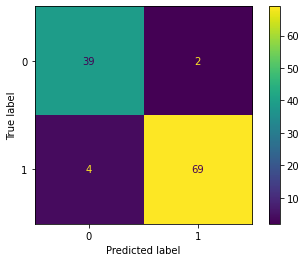

In [126]:
# importing all necessary libraries
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# confusion_matrix funnction a matrix containing the summary of predictions
cm = confusion_matrix(y_test, predictions)
print(cm)

# plot_confusion_matrix function is used to visualize the confusion matrix
# plot_confusion_matrix(classifier, X_test, y_test)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot()
plt.show()

In [127]:

# Importing all necessary libraries
from sklearn.metrics import precision_score

# Calculating the precision score of classifier
print(f"Precision Score of the classifier is: {precision_score(y_test, predictions)}")
# If our model detects a mail as spam which was not actually a spam mail then the user might miss an important mail i.e. here false positives should be reduced

Precision Score of the classifier is: 0.971830985915493


In [ ]:
# Importing all necessary libraries
from sklearn.metrics import recall_score

# Calculating the recall score of classifier
print(f"Recall Score of the classifier is: {recall_score(y_test, predictions)}")

# Take an example use case of cancer prediction. Consider a person who is actually having cancer but was predicted as a non-cancer patient by our classifier which can lead to mistreatment of the person i.e. here false negatives should be reduced

In [128]:
# Importing all necessary libraries
from sklearn.metrics import f1_score

# Calculating the F1 score of classifier
print(f"F1 Score of the classifier is: {f1_score(y_test, predictions)}")

F1 Score of the classifier is: 0.9583333333333334


AUC for our classifier is: 0.9769462078182426


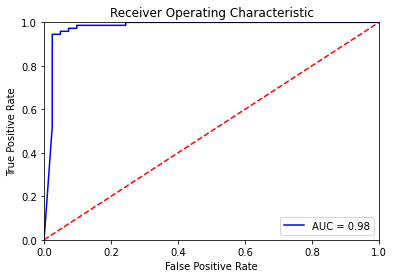

In [129]:
# Importing all necessary libraries
from sklearn.metrics import roc_curve, auc

class_probabilities = classifier.predict_proba(X_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# Printing AUC
print(f"AUC for our classifier is: {roc_auc}")

# Plotting the ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [101]:
import pandas as pd
import numpy as np
df = pd.read_csv('https://raw.githubusercontent.com/armandoordonez/machinelearning/main/datasets/arthritis.csv')
# The value 1 means the person has arthritis and value 2 means the person does not have arthritis

df.head()


,x.aidtst3,employ1,income2,weight2,height3,children,veteran3,blind,renthom1,sex1,...,x.denvst3,x.prace1,x.mrace1,x.exteth3,x.asthms1,x.michd,x.ltasth1,x.casthm1,x.state,havarth3
0,2.0,1.0,8.0,138.0,504.0,2.0,2.0,2.0,1.0,2,...,1,1.0,1.0,1,3,2.0,1,1,27.0,2
1,1.0,1.0,4.0,240.0,600.0,88.0,2.0,1.0,2.0,1,...,2,1.0,1.0,2,3,2.0,1,1,72.0,2
2,1.0,1.0,6.0,120.0,504.0,88.0,2.0,2.0,1.0,2,...,1,6.0,6.0,2,3,2.0,1,1,31.0,2
3,2.0,7.0,77.0,133.0,502.0,88.0,2.0,2.0,1.0,2,...,1,1.0,1.0,2,3,2.0,1,1,45.0,2
4,9.0,7.0,8.0,170.0,505.0,88.0,2.0,2.0,1.0,2,...,1,1.0,1.0,1,3,2.0,1,1,24.0,2


In [102]:
df.columns

Index(['x.aidtst3', 'employ1', 'income2', 'weight2', 'height3', 'children',
       'veteran3', 'blind', 'renthom1', 'sex1',
       ...
       'x.denvst3', 'x.prace1', 'x.mrace1', 'x.exteth3', 'x.asthms1',
       'x.michd', 'x.ltasth1', 'x.casthm1', 'x.state', 'havarth3'],
      dtype='object', length=108)

In [ ]:
df['havarth3'] = df['havarth3'].replace(2, 0)

In [109]:
X= df.drop(columns=["havarth3"])
y= df['havarth3']

In [111]:
np.unique(y, return_counts=True)

(array([0, 1]), array([7906, 4027]))

In [112]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.34, random_state = 35)

In [113]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
uni = SelectKBest(score_func = f_classif, k = 9)
fit = uni.fit(X, y)
reduced_training = fit.transform(x_train)
reduced_test = uni.transform(x_test)

In [114]:

x_train.columns[fit.get_support(indices=True)].tolist()


['employ1',
 'rmvteth4',
 'genhlth',
 'x.age.g',
 'x.age80',
 'x.ageg5yr',
 'x.age65yr',
 'x.phys14d',
 'x.hcvu651']

In [115]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=6, random_state=0) 
clf = classifier.fit(reduced_training, y_train)

In [116]:
# Accuracy
clf.score(reduced_test, y_test)


0.7417447018235584

In [117]:
clf.score(reduced_training, y_train)


0.7466666666666667

In [118]:
def confusion_matrix_score(clf, X, y):
    y_pred = clf.predict(X)
    cm = confusion_matrix(y, y_pred)
    return {'tp': cm[0, 0], 'fn': cm[0, 1],
            'fp': cm[1, 0], 'tn': cm[1, 1]}

[[2318  397]
 [ 651  692]]


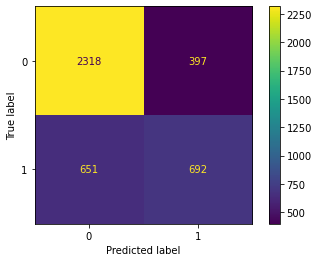

In [119]:
# importing all necessary libraries
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# confusion_matrix funnction a matrix containing the summary of predictions
# cm = confusion_matrix_score(clf, reduced_test, y_test)
# confusion_matrix funnction a matrix containing the summary of predictions

y_pred = clf.predict(reduced_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

# plot_confusion_matrix function is used to visualize the confusion matrix
# plot_confusion_matrix(classifier, X_test, y_test)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot()
plt.show()

#print(cm)

In [81]:
# true positive rate(TPR) = true positive / (true positive + false negative)
# how many people with arthritis are detected correctly

# false-positive rate(FPR) = false positives / (false positives + true negatives)  
# how many people without arthritis are wrongly detected

cm1 =  {'tp': cm[0, 0], 'fn': cm[0, 1], 'fp': cm[1, 0], 'tn': cm[1, 1]}

tn, fp, fn, tp = cm1['tn'], cm1['fp'], cm1['fn'], cm1['tp']

tpr = tp/(tp+fn)

fpr = fn/(fn+tp)

precision = tp/(tp+fp)

recall = tn/(tn+fn)

(precision, recall)

(0.63544536271809, 0.7807342539575615)